## SELECTION DES ATTRIBUTS

### importer les bibliotheques necissaires

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

### importer dataset
eliminer la premiere colonne ainsi que les ligne dont y'a des valeurs NA

In [2]:
url = "./airquality.csv"
data = pd.read_csv(url, sep=',')

data = data[~np.isnan(data).any(axis=1)]

data = data.drop(data.columns[0], axis=1) 

### Normalisation du dataset

In [3]:
numeric_columns = data.select_dtypes(include=['int', 'float']).columns

scaler = MinMaxScaler()

data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

### Correlation matrix

In [4]:
df = pd.DataFrame(data)

correlation = df.corr()
print(correlation)

            Ozone   Solar.R      Wind      Temp     Month       Day
Ozone    1.000000  0.348342 -0.612497  0.698541  0.142885 -0.005190
Solar.R  0.348342  1.000000 -0.127183  0.294088 -0.074067 -0.057754
Wind    -0.612497 -0.127183  1.000000 -0.497190 -0.194496  0.049871
Temp     0.698541  0.294088 -0.497190  1.000000  0.403972 -0.096546
Month    0.142885 -0.074067 -0.194496  0.403972  1.000000 -0.009001
Day     -0.005190 -0.057754  0.049871 -0.096546 -0.009001  1.000000


### visualisation de l'histogram

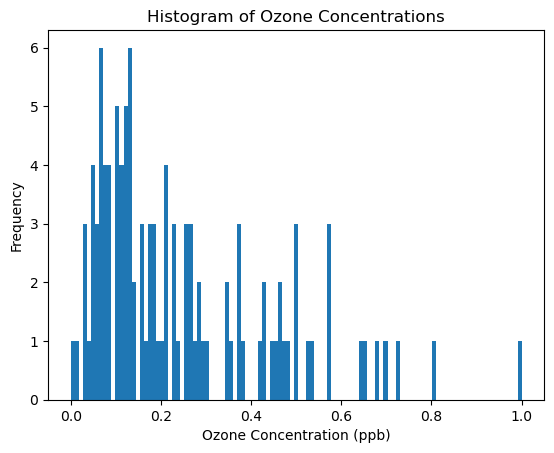

In [5]:
plt.hist(data["Ozone"], bins=data.shape[0])

plt.xlabel("Ozone Concentration (ppb)")
plt.ylabel("Frequency")
plt.title("Histogram of Ozone Concentrations")

plt.show()

### Choix du vecteur y et les vars depandants dans x

In [6]:
x = df.drop('Ozone', axis=1)
y = data['Ozone']

### preparation des training_data et test_data 

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### Ajouter une colonne (1,1,...,1) au matrice x

In [8]:
ones_column = np.ones((x_train.shape[0], 1))
x_train = np.hstack((ones_column, x_train))

ones_column = np.ones((x_test.shape[0], 1))
x_test = np.hstack((ones_column, x_test))

### rendre le shape de y (n,1) a la place de (n,)

In [9]:
y_array = y_train.to_numpy()
y_train= y_array.reshape(y_train.shape[0], 1)

y_array = y_test.to_numpy()
y_test= y_array.reshape(y_test.shape[0], 1)

# Linear regression avec pénalisation Ridge

In [10]:
n_iterations = 100
learning_rate = 0.01
lambda_ = 80


In [11]:
def initialisation(n):
    np.random.seed(0)  
    theta = np.random.randn(n, 1)
    return theta

In [12]:
def Linear_model(x_train, theta):
    return x_train.dot(theta)

In [13]:
def cost_function(x_train, y, theta, lambda_):
    m = len(y)
    ridge_term = (lambda_ / 2*m) * np.sum(theta[1:]**2)
    return (1/(2*m) * np.sum((Linear_model(x_train, theta) - y)**2)) + ridge_term

In [14]:
def grad(x_train, y_train, theta , lambda_):
    m = len(y_train)
    grad = (1 / m) * x_train.T.dot(Linear_model(x_train, theta) - y_train)
    ridge_term = (lambda_ / m) * theta
    ridge_term[0] = 0
    return grad + ridge_term

In [15]:
def gradient_descent(x_train, y_train, theta, lambda_, learning_rate, n_iterations):

    cost_history = np.zeros(n_iterations)
    
    for i in range(n_iterations):

        theta = theta - learning_rate * grad(x_train, y_train, theta, lambda_)
        
        cost_history[i] = cost_function(x_train, y_train, theta , lambda_)
        
    return theta, cost_history

In [16]:
def visualize_cost_history(cost_history,n_iterations):
    plt.plot(range(n_iterations), cost_history)

In [17]:
def visualize_predictions(x,y,predictions):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(x[:,0], x[:,1], y)
    ax.scatter(x[:,0], x[:,1], predictions)


In [18]:
def coef_determination(y_train, pred):

    u = ((y_train - pred)**2).sum()
    v = ((y_train - y_train.mean())**2).sum()
    return 1 - u/v

In [19]:
def linear_regression_predict(x,y,lambda_,learning_rate,n_iterations):
    theta = initialisation(x.shape[1])
    theta_final, cost_history = gradient_descent(x,y,theta,lambda_,learning_rate,n_iterations)
    visualize_cost_history(cost_history,n_iterations)
    prediction = Linear_model(x, theta_final)
    visualize_predictions(x,y,prediction)
    
    return coef_determination(y,prediction)

-2.8411579941018643

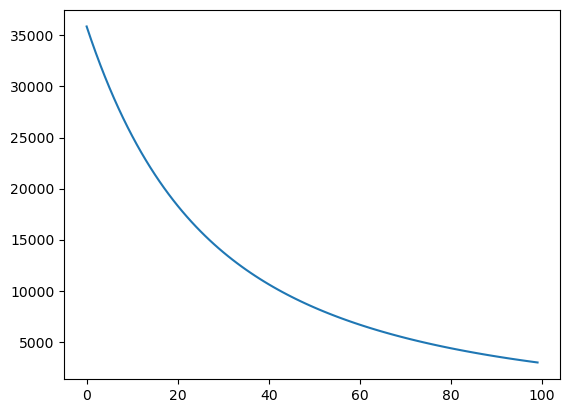

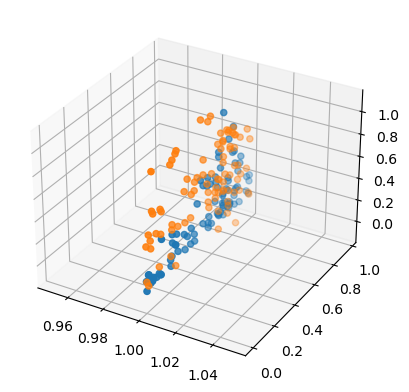

In [20]:
linear_regression_predict(x_train,y_train,lambda_,learning_rate,n_iterations)

-3.2563393214181486

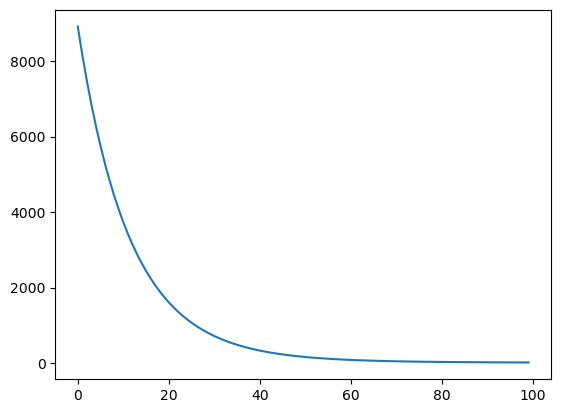

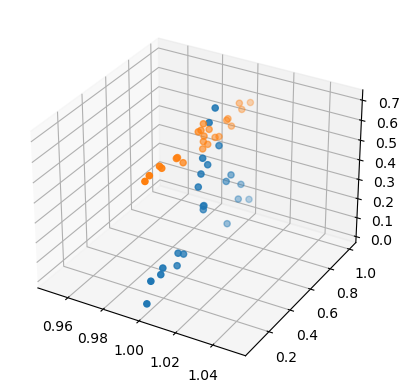

In [21]:
linear_regression_predict(x_test, y_test,lambda_,learning_rate,n_iterations)